In [1]:
# prepare environment
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import scipy.stats as stats
import sklearn.metrics
from statsmodels.formula.api import ols

Punchline: is our model better than the model that just predicts the average?

The best model we can make with no additional information: $\hat{y} = \bar{y}$

# Setup / Functions

In [2]:
def residuals(actual, predicted):
    return predicted - actual

def sse(actual, predicted):
    return (residuals(actual, predicted) ** 2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

In [3]:
def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

### Create a file named `evaluate.py` that contains the following functions.

    - `plot_residuals(y, yhat):` creates a residual plot
    - `regression_errors(y, yhat):` returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)


  - `baseline_mean_errors(y):` computes the SSE, MSE, and RMSE for the baseline model


  - `better_than_baseline(y, yhat):` returns true if your model performs better than the baseline, otherwise false


  - `model_significance(ols_model):` that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the `rsquared` and `f_pvalue` properties from the ols model)
   

In [4]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    sse_baseline = sse(actual, actual.mean())
    sse_model = sse(actual, predicted)
    return sse_model < sse_baseline

def model_significance(ols_model):
    return {
        'r^2 -- variance explained': ols_model.rsquared,
        'p-value -- P(data|model == baseline)': ols_model.f_pvalue,
    }

### Exercise
1. load the tips dataset from either pydataset or seaborn

In [5]:
tips = pydataset.data('tips')
model = ols('tip ~ total_bill', tips).fit()

In [6]:
# we can use the fit model on new data
new_data = pd.Series([10, 20], name='total_bill')
model.predict(new_data)

0    1.970515
1    3.020760
dtype: float64

In [7]:
actual = tips.tip
predicted = model.predict()

In [9]:
model2 = ols('tip ~ size', tips).fit()
predicted2 = model2.predict()

In [10]:
regression_errors(actual, predicted2)

sse     353.834427
ess     111.378050
tss     465.212477
mse       1.450141
rmse      1.204218
dtype: float64

In [11]:
regression_errors(actual, predicted)

sse     252.788744
ess     212.423733
tss     465.212477
mse       1.036019
rmse      1.017850
dtype: float64

In [12]:
regression_errors(actual, predicted)['sse'] < regression_errors(actual, predicted2)['sse']

True

In [13]:
better_than_baseline(actual, predicted)

True

In [14]:
# we can convert a dictionary to a pandas series easily
regression_errors(actual, predicted)

sse     252.788744
ess     212.423733
tss     465.212477
mse       1.036019
rmse      1.017850
dtype: float64

### Exercise
2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.


In [15]:
pd.DataFrame({
    'model 1 (tip ~ total_bill)': regression_errors(actual, predicted),
    'model 2 (tip ~ size)': regression_errors(actual, predicted2),
})

,model 1 (tip ~ total_bill),model 2 (tip ~ size)
sse,252.788744,353.834427
ess,212.423733,111.378050
tss,465.212477,465.212477
mse,1.036019,1.450141
rmse,1.017850,1.204218


In [16]:
model_significance(model)

{'r^2 -- variance explained': 0.45661658635167646,
 'p-value -- P(data|model == baseline)': 6.692470646863376e-34}

In [17]:
sklearn_r2 = sklearn.metrics.r2_score(actual, predicted)

In [18]:
our_r2 = r2_score(actual, predicted)

In [19]:
our_r2 == sklearn_r2

False

In [20]:
our_r2, sklearn_r2

(0.45661658635167607, 0.45661658635167657)

In [21]:
np.isclose(our_r2, sklearn_r2)

True

In [22]:
print('our mse', mse(actual, predicted))
print('sklearn', sklearn.metrics.mean_squared_error(actual, predicted))

our mse 1.036019442011377
sklearn 1.036019442011377


In [23]:
%%timeit

mse(actual, predicted)

400 µs ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%%timeit

sklearn.metrics.mean_squared_error(actual, predicted)

229 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Exercise 
3. Plot the residuals for the linear regression model

In [10]:
df['residual'] = df['yhat'] - df['tip']
df['residual_baseline'] = df['yhat_baseline'] - df['tip']
df.head()

,total_bill,tip,yhat_baseline,yhat,residual,residual_baseline
1,16.99,1.01,2.998279,2.704636,1.694636,1.988279
2,10.34,1.66,2.998279,2.006223,0.346223,1.338279
3,21.01,3.50,2.998279,3.126835,-0.373165,-0.501721
4,23.68,3.31,2.998279,3.407250,0.097250,-0.311721
5,24.59,3.61,2.998279,3.502822,-0.107178,-0.611721


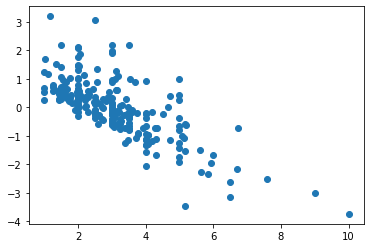

In [11]:
plt.scatter(df.tip, df.residual)

### Exercise
4. Calculate the following:
    -  SSE: Sum of Squared Errors
    -  MSE: Mean Squared Error
    - RMSE: Root Mean Squared Error 

These are going to be calculated for the baseline model created above
< based of `df.tip` and `yhat`

In [24]:
# SSE

SSE = sum(df['residual'] ** 2)
print(f'SSE =' , SSE)

SSE = 252.78874385077603


In [25]:
# ESS
# predicted values are yhat
# actual values are tip

ESS = sum((df.yhat - df.tip.mean())**2)
print(f'ESS =', ESS)

ESS = 212.4237331984042


In [26]:
# TSS
TSS = SSE + ESS
print(f'TSS =', TSS)

TSS = 465.2124770491802


In [27]:
# MSE

MSE = SSE / len(df)
print(f'MSE = ', MSE)

MSE =  1.036019442011377


In [28]:
# RMSE

RMSE = sqrt(MSE)
print(f'RMSE =', RMSE)

RMSE = 1.0178504025697377


#### Exercise
5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

    -  SSE: Sum of Squared Errors
    -  ESS: Explained Sum of Squares
    -  TSS: Total Sum of Squares
    -  MSE: Mean Squared Error
    - RMSE: Root Mean Squared Error

using `yhat_baseline` to predict the average tip amount

In [17]:
BSSE = sum(df['yhat_baseline'] ** 2)
BSSE

2193.480722950811

In [18]:
BMSE = BSSE / len(df)
BMSE

8.9896750940607

In [19]:
BRMSE = sqrt(BMSE)
BRMSE

2.998278688524584

#### Exercise

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [20]:
if SSE < BSSE:
    print('SSE performs better than our baseline model')
else:
    print('Our baseline preforms better than our predicted model')

SSE performs better than our baseline model


### Exercise
7. What is the amount of variance explained in your model?

In [23]:
# coefficiant of Determination

R2 = ESS/TSS
print('R-squared = ', round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.457
Percent of variance in y explained by x =  45.7 %


# MPG    

In [25]:
mpg = pydataset.data('mpg')

In [26]:
model = ols('hwy ~ displ', mpg).fit()

In [27]:
actual = mpg.hwy # y
predicted = model.predict() # yhat

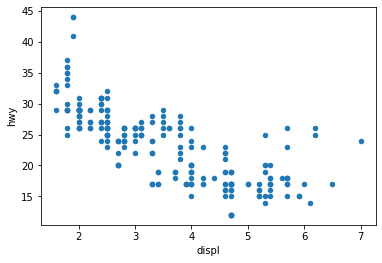

In [28]:
mpg.plot.scatter(y='hwy', x='displ')

In [29]:
regression_errors(actual, predicted)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
dtype: float64

In [30]:
model_significance(model)

{'r^2 -- variance explained': 0.5867866723989039,
 'p-value -- P(data|model == baseline)': 2.0389744555910457e-46}

In [31]:
better_than_baseline(actual, predicted)

True

## More on Visualizing Residuals

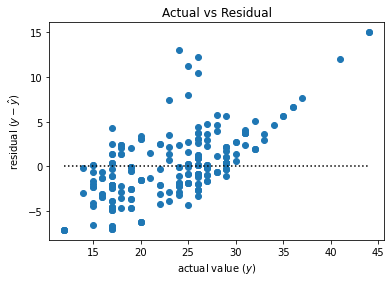

In [32]:
plot_residuals(actual, predicted)

In [33]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0, 0].hist(residuals, bins=20, ec='black', fc='white')
    axs[0, 0].set(title="Distribution of Residuals")

    axs[0, 1].scatter(actual, predicted, marker='.', c='firebrick')
    axs[0, 1].plot([actual.min(), actual.max()], [actual.min(), actual.max()], ls=':', color='black')
    axs[0, 1].set(title="Actual vs Predicted", xlabel="$y$", ylabel=r"$\hat{y}$")

    axs[1, 0].scatter(actual, residuals, marker='.', c='firebrick')
    axs[1, 0].hlines(0, actual.min(), actual.max(), ls=':', color='black')
    axs[1, 0].set(title="Actual vs Residuals", xlabel="$y$", ylabel=r"$y - \hat{y}$")

    axs[1, 1].scatter(predicted, residuals, marker='.', c='firebrick')
    axs[1, 1].hlines(0, actual.min(), actual.max(), ls=':', color='black')
    axs[1, 1].set(
        title="Predicted vs Residuals", xlabel=r"$\hat{y}$", ylabel=r"$y - \hat{y}$"
    )

    return fig, axs

(<Figure size 864x864 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2734a790>,
       dtype=object))

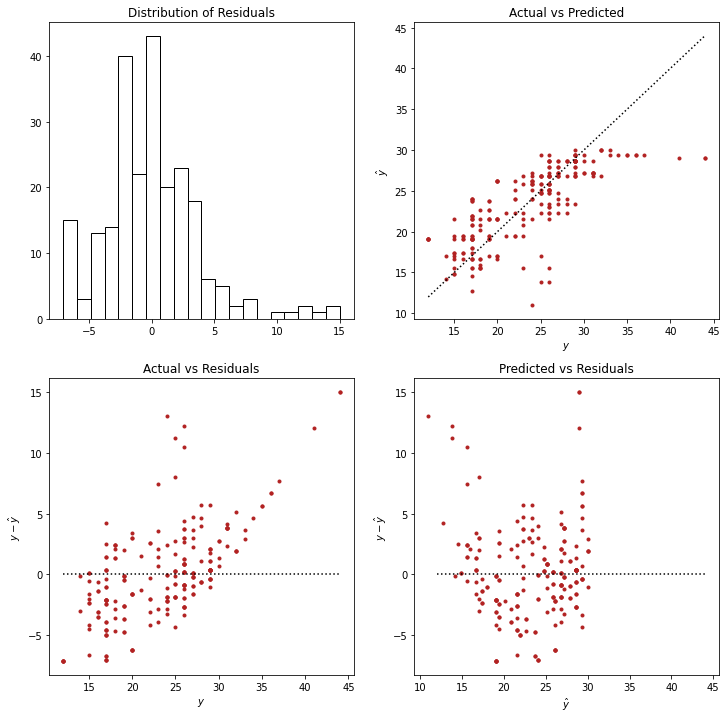

In [34]:
plot_residuals(actual, predicted)

Text(0.5, 1.0, 'This is what random noise looks like?')

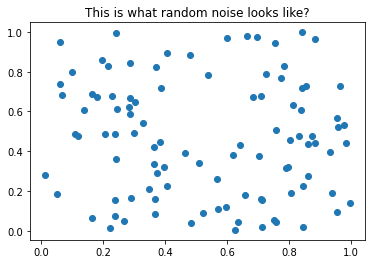

In [35]:
plt.scatter(np.random.uniform(size=100), np.random.uniform(size=100))
plt.title('This is what random noise looks like?')